<img align="left" src="img/ECE364-logo.png" width="300px" style="padding:30px;border:thin solid white;"> 

# Lecture 0 - Course Intro and PyTorch Basics
## ECE364 - Programming Methods for Machine Learning
### Nickvash Kani 












###### Slides based off prior lectures by Alex Schwing, Aigou Han, Farzas Kamalabadi, Corey Snyder. All mistakes are my own!

Topics covered: 

- Learning machine learning fundamentals including: 
    - linear algebra review
    - automatic regression and classifcation fitting models
    - building complex neural networks (deep models)

- Learn the fundamentals of PyTorch for basic deep learning models
    - efficient computation/storage
    - computational graphs/back-propagation
    - formatting data and training NN models
    
- Advanced machine learning topics
    - advanced deep network concepts like attention (transformer models)
    - large language models basics and usage

**Big goal:** learn machine learning basics through applications. (Theory is awesome, but most of us just want to passs a interview)

View course website and show the following: 
- Course staff
- Course structure
- Homeworks
- Exams
- Project

### Lecture plan:

- Introduction to PyTorch 
- Sample PyTorch Code 
- Tensor Basics
- Tensor Operations 

## Part 1:  Introduction to PyTorch

### What is PyTorch? 

PyTorch is a open-source machine learning library used for various tasks that require some level of model optimization like natural language processing, computer vision. 

- Originally developed by Meta AI and now a part of the Linux Foundation 
- Developed in conjunction with with Convolutional Architecture for Fast Feature Encoding (Caffe2) (C++  machine learning framework) 
    - But models between frameworks were incompatible ...
    - So Meta and Microsoft created the Open Neural Network Exchange (ONNX) for converting ML models between frameworks
    - Caffe2 was merged into PyTorch 2 years later 
- PyTorch 2 was released in 2023 and introduced TorchDynamo, a Python level compiler that offered a lot of ML specific optimizations and significant speed-ups

### Why use PyTorch

When PyTorch was introduced in 2017, Tensorflow and Keras (Tersorflow wrapper) were already mature machine learning libraries. But now 85% of academic papers use PyTorch: **why?**

- Simplicity - easy to use, **extend** and debug
- Python integration - Python is now the most popular language in the world
- The tensor data type, perfect abstraction of NumPy data
- Accelerated computation using GPUs
- Early Caffe2 integration gave it a high performing C++ compiler

## Part 2: Feeling out PyTorch

### Software installation and initialization

[Install PyTorch using anaconda or pip](https://pytorch.org/get-started/locally/)

Check your successful installation using the following code

In [7]:
import numpy as np
print(np.__version__)

1.26.4


In [8]:
import torch
print(torch.__version__)

2.3.1


### Datasets

Many classic datasets come [preprogrammed into PyTorch](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

Let's look at one of these datasets: [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

*Due to licensing issues CIFAR is no longer a default in the PyTorch library but it is still easily accessible

Files already downloaded and verified


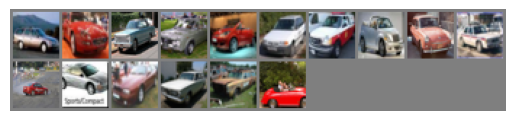

In [64]:
#credit to https://jamesmccaffrey.wordpress.com/2020/08/07/displaying-cifar-10-images-using-pytorch/

import torch as T
import torchvision as tv
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0))) 
  plt.axis('off')
  plt.show()

transform = transforms.Compose( [transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5),
  (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root='.\\data', train=True, download=True, transform=transform)
trainloader = T.utils.data.DataLoader(trainset,
batch_size=100, shuffle=False, num_workers=1)

# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
#   'frog', 'horse', 'ship', 'truck')

# get first 100 training images
dataiter = iter(trainloader)
imgs, lbls = next(dataiter)

images = []
for i in range(100):  # show just the cars
    if lbls[i] == 1:  # 1 = car
        images.append(imgs[i])

images_grid = tv.utils.make_grid(images, nrow=10)        
imshow(images_grid)

### Small Torch Model

[AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf): 

<img align="left" src="img/alexnet.jpg" width="1000px" style="padding:30px;border:thin solid white;"> 

### Jupyter notebook demonstration (on Google colab)

- http://colab.research.google.com (provides access to GPUs and TPUs)

## Part 3: Introduction to Tensors

Let's think about vectors and how we would initialize/use them:

In [65]:
vec1 = [1,2,3]

print(vec1)

[1, 2, 3]


In [66]:
import numpy as np

vec2 = np.array(vec1)
print(vec2)

[1 2 3]


Why do we use numpy if vanilla python has arrays/matrices anyway? 

In [67]:
import time
import numpy as np

size_of_vec = int(1e6)

In [13]:
def pure_python_version():
    t1 = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - t1

t1 = pure_python_version()
print('Pure Python time: {:.6f}'.format(t1))

Pure Python time: 0.235685


In [14]:
def numpy_version():
    t1 = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - t1

t2 = numpy_version()
print('Numpy time: {:.6f}'.format(t2))

Numpy time: 0.018518


Why does NumPy perform so much faster than normal Python arrays (Hint, isn't the lack of commas weird)?

### What about tensors? 

- Vectors are 1-D arrays

- Matrices are 2-D arrays

- Tensors are n-dimensional arrays of various sizes

### How to create a Torch tensor

In [15]:
a = [[j+3*i for j in range(3)] for i in range(2)]
print(a)

[[0, 1, 2], [3, 4, 5]]


In [16]:
np_array = np.array(a)
print(np_array)

[[0 1 2]
 [3 4 5]]


In [17]:
#Initialize from normal python array

import torch
a_data = torch.tensor(a)
print(a_data)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
#Initialize from NumPy array


a_np = torch.from_numpy(np_array)
print(a_np)

tensor([[0, 1, 2],
        [3, 4, 5]])


### Useful tensor initializations:

In [68]:
shape = (2,3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape, dtype=int)
zeros_tensor = torch.zeros(shape)

print("Random Tensor: \n {} \n".format(rand_tensor))
print("Ones Tensor: \n {} \n".format(ones_tensor))
print("Zeros Tensor: \n {}".format(zeros_tensor))

Random Tensor: 
 tensor([[[0.5547, 0.3423, 0.6343, 0.3644],
         [0.7104, 0.9464, 0.7890, 0.2814],
         [0.7886, 0.5895, 0.7539, 0.1952]],

        [[0.0050, 0.3068, 0.1165, 0.9103],
         [0.6440, 0.7071, 0.6581, 0.4913],
         [0.8913, 0.1447, 0.5315, 0.1587]]]) 

Ones Tensor: 
 tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]]) 

Zeros Tensor: 
 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### Some simple Tensor Attributes

In [69]:
tensor = torch.rand(3,4)

print("Shape of tensor: {}".format(tensor.shape))
print("Datatype of tensor: {}".format(tensor.dtype))
print("Device tensor is stored on: {}".format(tensor.device))

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor indexing

Tensors can be indexed just like NumPy arrays

In [21]:
a = [[j+3*i for j in range(3)] for i in range(2)]
a_tensor = torch.tensor(a)
print(a_tensor)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [22]:
# example of slicing
print(a_tensor[:,1])

tensor([1, 4])


In [23]:
print(a_tensor[1,0].item())

3


In [24]:
torch.manual_seed(42)

# Generate random integers
aa = torch.randint(0, 100, (2, 3, 4))
print(aa)

tensor([[[42, 67, 76, 14],
         [26, 35, 20, 24],
         [50, 13, 78, 14]],

        [[10, 54, 31, 72],
         [15, 95, 67,  6],
         [49, 76, 73, 11]]])


In [70]:
print(aa)

tensor([[[42, 67, 76, 14],
         [26, 35, 20, 24],
         [50, 13, 78, 14]],

        [[10, 54, 31, 72],
         [15, 95, 67,  6],
         [49, 76, 73, 11]]])


Alertness Check - **What is the index of the value "78" ?**

In [73]:
print(aa.shape)
print(aa[0][2][2])

torch.Size([2, 3, 4])
tensor(78)


In [27]:
print(aa.shape)

torch.Size([2, 3, 4])


### Basic Tensor Operations

Same idea as with NumPy arrays/matrices

In [28]:
a = [[i+3*j for i in range(3)] for j in range(2)]
b = [[j+2*i for i in range(3)] for j in range(2)]
c = [[int(i+3*j%2==1) for i in range(2)] for j in range(3)]

a_tensor = torch.tensor(a)
b_tensor = torch.tensor(b)
c_tensor = torch.tensor(c)
print(a_tensor)
print(b_tensor)
print(c_tensor)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 2, 4],
        [1, 3, 5]])
tensor([[0, 1],
        [1, 0],
        [0, 1]])


In [29]:
# This computes the ****** product
print(f"a_tensor.mul(b_tensor) \n {a_tensor.mul(b_tensor)} \n")
# Alternative syntax:
print(f"a_tensor * b_tensor \n {a_tensor * b_tensor}")

a_tensor.mul(b_tensor) 
 tensor([[ 0,  2,  8],
        [ 3, 12, 25]]) 

a_tensor * b_tensor 
 tensor([[ 0,  2,  8],
        [ 3, 12, 25]])


In [30]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[1.0899, 1.0192, 0.7508],
        [1.0192, 1.9040, 0.8580],
        [0.7508, 0.8580, 0.6950]]) 

tensor @ tensor.T 
 tensor([[1.0899, 1.0192, 0.7508],
        [1.0192, 1.9040, 0.8580],
        [0.7508, 0.8580, 0.6950]])


In [31]:
# This transposes a tensor
print('Original tensor \n {} \n'.format(a_tensor))
print('Transposed tensor \n {} \n'.format(a_tensor.T))
print('Another way to transpose the tensor \n {} \n'.format(torch.transpose(a_tensor, dim0=0, dim1=1)))

Original tensor 
 tensor([[0, 1, 2],
        [3, 4, 5]]) 

Transposed tensor 
 tensor([[0, 3],
        [1, 4],
        [2, 5]]) 

Another way to transpose the tensor 
 tensor([[0, 3],
        [1, 4],
        [2, 5]]) 



Alertness check: **Why is there a a dim0/dim1 option in tensor.transpose?**

In [32]:
x = torch.tensor([[[i for k in range(4)] for j in range(3)] for i in range(2)])
print(x.shape)
print("Original Vector:")
print(x)

torch.Size([2, 3, 4])
Original Vector:
tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])


Let's say we want to change x to be a $4\times 3 \times 2$ tensor? How to we transpose it? 

In [75]:
print("Original Vector:")
print(x)
print(print(x.shape))
print("Transposed Vector (Dim = ?):")
xt=torch.transpose(x, dim0=2, dim1=0)
print(xt)
print(print(xt.shape))

Original Vector:
tensor([[[0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])
torch.Size([2, 3, 4])
None
Transposed Vector (Dim = ?):
tensor([[[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]]])
torch.Size([4, 3, 2])
None


<img align="left" src="img/transpose_example_2.png" width="600px" style="padding:30px;border:thin solid white;"> 

What if we do x.T?

In [48]:
print(x.T)

tensor([[[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]],

        [[0, 1],
         [0, 1],
         [0, 1]]])


[Why?](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.T)

### Elementwise operations

Many functions can be applied on a tensor element by element
- torch.cos
- torch.sin
- torch.exp
- torch.log

These functions **return a new tensor** with the function being applied to each element in the tensor

In [37]:
a = torch.ones([4,4])
b = torch.log(a)
print(a)
print(b)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


### In-place operations

Operations that have a ```_``` suffix are in-place. For example: ```x.copy_(y)```, ```x.t_()```, ```x.exp_()```, will change ```x```.

In [50]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


### Interaction with NumPy

You'll likely need to convert between a NumPy array (usually when plotting data/results). 


In [51]:
# Convert from tensor to NumPy array

tensor = torch.ones(4, 4)
print(tensor)
print(tensor.numpy())

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [52]:
# Covert from NumPy array to torch:

n = np.ones(5)
t = torch.from_numpy(n)
print(t)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


Cool thing is that changes in NumPy array are reflected in the tensor!

In [53]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


Both numpy array and tensor data point to the same contiguous block in memory. Very different than view, speaking of which: 

## Tensor Views

Imagine we want to access part of a tensor (e.g., first row) or we want to permute rows and columns. Do we really need to allocate new memory to store this part of the tensor?

No:
- a tensor can be a "view" of an existing tensor
- a "view" of a tensor shares the data with the original tensor

In [2]:
import torch
a = torch.tensor([[4*i+j for j in range(4)] for i in range(4)])
b = a.view(2, 8)
print(a)
print(b)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]])


In [3]:
a[1] = 100

print(a)
print(b)

tensor([[  0,   1,   2,   3],
        [100, 100, 100, 100],
        [  8,   9,  10,  11],
        [ 12,  13,  14,  15]])
tensor([[  0,   1,   2,   3, 100, 100, 100, 100],
        [  8,   9,  10,  11,  12,  13,  14,  15]])


How much memory does ```a``` and ```b``` consume?

In [55]:
import sys
print("a is sized: " + str(sys.getsizeof(a)))
print("b is sized: " + str(sys.getsizeof(b)))

a is sized: 88
b is sized: 88


Makes sense right? 

In [76]:
c = torch.tensor([[4*i+j for j in range(100)] for i in range(100)])
print("c is sized: " + str(sys.getsizeof(c)))

c is sized: 88


Wait what? Why is every sized the same?! c is so much bigger.....

In [57]:
print("The data in 'a' is sized: " + str(a.element_size() * a.nelement()))
print("The data in 'b' is sized: " + str(b.element_size() * b.nelement()))
print("The data in 'c' is sized: " + str(c.element_size() * c.nelement()))

The data in 'a' is sized: 128
The data in 'b' is sized: 128
The data in 'c' is sized: 80000


In [58]:
a = torch.tensor([[4*i+j for j in range(4)] for i in range(4)])
b = a.view(-1, 16)
c = torch.tensor([[5*i+j for j in range(5)] for i in range(5)])

def same_storage(x, y):
    return x.storage().data_ptr() == y.storage().data_ptr()

print("Do 'a' and 'b' share a view? " + str(same_storage(a, b)))
print("Do 'a' and 'c' share a view? " + str(same_storage(a, c))) 


Do 'a' and 'b' share a view? True
Do 'a' and 'c' share a view? False


Hard to know what creates a view and what creates a copy, but general rule of thumb is that a view is created unless there are no other options: 

|Creates tensor views| Creates tensor copies|
|:-------------------|:------------------|
|  ```view()``` - reshapes tensor     |   ```clone()``` - explicity creates a copy|
|  ```narrow()``` - extracts contiguous subset of tensor     |   ```detach()``` - creates a new tesnor detached from computational graph|
| ```transpose()``` - swaps two dimensions of a tensor | ```copy() ``` - copies data from one tensor to another|
| ```permute()``` - generalizes transpose to many dimensions | ```to() ``` - copies data to gpu|
| ```squeeze()``` - removes dimensions of size 1 | |
| ```unsqueeze()``` - add dimension of size 1 | |
| ```as_strided()``` - creates a view with non-contiguous strides (advanced) | |


### Tensor strides

How do we create a new tensor with different dimensions, but with the same data? 

strides

Imagine that this is a tensor: 

<img align="left" src="img/stride_tensor_example.png" width="300px" style="padding:30px;border:thin solid white;"> 

The tensor class hold many properties: 

- sizes: (w,h,d)
- dtype: int/float/...
- device: cpu/gpu
- layout: strided
- strides: (w*h, w, 1)

Strided representation: 

<img align="left" src="img/stride_mapping_example.png" width="450px" style="padding:30px;border:thin solid white;"> 

So for instance, the element at index [1,0] corresponds to the memory at: base_ptr + (1*stride[0] + 0*stride[1])*size(dtype)

For the left example it would be: 0x10+(1*2+0*1)*4=0x18

*credit to: http://blog.ezyang.com/2019/05/pytorch-internals/

### Combining Tensors

We can concatenate tensors along different dimensions **that already exist**! All other dimensions must match.

In [59]:
a = torch.randn(2,3)
b = torch.cat((a,a,a),dim=0)
c = torch.cat((a,a,a),dim=1)

In [62]:
print('Original tensor')
print(a.shape)
print(a)
print('')
print('Concatenate in dimension 0 (rows)')
print(b.shape)
print(b)
print('')
print('Concatenate in dimension 1 (rows)')
print(c.shape)
print(c)

Original tensor
torch.Size([2, 3])
tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])

Concatenate in dimension 0 (rows)
torch.Size([6, 3])
tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])

Concatenate in dimension 1 (rows)
torch.Size([2, 9])
tensor([[ 1.1103, -1.6898, -0.9890,  1.1103, -1.6898, -0.9890,  1.1103, -1.6898,
         -0.9890],
        [ 0.9580,  1.3221,  0.8172,  0.9580,  1.3221,  0.8172,  0.9580,  1.3221,
          0.8172]])


Alertness check: Do ```a``` and ```b``` share the same storage? 

In [77]:
print(same_storage(a, b))

False


We can also stack tensors along a **new dimension**

In [ ]:
a = torch.randn(2,3)
b = torch.stack((a,a,a,a),dim=0)
c = torch.stack((a,a,a,a),dim=1)
d = torch.stack((a,a,a,a),dim=2)

In [78]:
print('Original tensor')
print(a.shape)
print(a)
print('')
print('Stack in dimension 0')
print(b.shape)
print(b)
print('')
print('Stack in dimension 1')
print(c.shape)
print(c)
print('Stack in dimension 2')
print(d.shape)
print(d)

Original tensor
torch.Size([2, 3])
tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])

Stack in dimension 0
torch.Size([6, 3])
tensor([[ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])

Stack in dimension 1
torch.Size([100, 100])
tensor([[  0,   1,   2,  ...,  97,  98,  99],
        [  4,   5,   6,  ..., 101, 102, 103],
        [  8,   9,  10,  ..., 105, 106, 107],
        ...,
        [388, 389, 390,  ..., 485, 486, 487],
        [392, 393, 394,  ..., 489, 490, 491],
        [396, 397, 398,  ..., 493, 494, 495]])
Stack in dimension 2


NameError: name 'd' is not defined

### Adding dimensions

We can also add dimensions if we need them

In [80]:
a = torch.randn(2,3)
b = a.unsqueeze(0)

In [81]:
print(a.shape)
print(b.shape)
c = b.squeeze(0)
print(c.shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([2, 3])


### Converting from one datatype to another

Use the ```Tensor.to(...)``` function but keep in mind possible loss of bits

In [82]:
x = torch.ones((2,4), dtype=torch.int32)
print(x)
y = x.to(torch.float64)
print(y)

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


Can do this to save space. 

## That is it for now

### Will discuss storage, indexing, data-types, and functions next time!